In [164]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup as bs
import random
import time
import json
import pickle
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [121]:
with open("listas_usuarios_5.pickle", "rb") as archivo:
    listas = pickle.load(archivo)

In [122]:
gran_df = pd.DataFrame()
for user_id, value in listas.items():
    name = value.pop("nombre")
    value = {x[0]: x[1][0] for x in value.items() if (x[1][1] == 2) and (x[1][0] > 0)}
    if len(value) == 0:
        print(name, value)
        continue
    dato = {f"{user_id}:{name}": value}
    dato_df = pd.DataFrame.from_dict(dato, orient='columns')
    gran_df = pd.concat([gran_df, dato_df], axis=1)

Sadless {}
Tranboy {}
theresianggara {}
SakuraMizuki {}
nbb113 {}
Rangefull {}
tonged {}
Nymevoli {}
JackieWong {}
Kyzr_ {}
itachan1995 {}
saad_berisha-7 {}
jxpei {}
4_442213 {}
baldy1997 {}
Konamisequence {}
Requiescatinpace {}
maxley {}
onodasakamichi {}
reaper6400 {}
caiovinii {}
watersn {}
Shadowwarior91 {}
monstriukas {}
kyandiichan {}
kagayema {}
fezatron {}
Redxd98 {}
Alaanmower {}
Emkayism {}
harkwan {}
HolicStarzzz {}
ToySoldier {}
Testimonial {}
Catalix {}
lanerain {}
junthegamer {}
TrashB0at {}
Hampo12 {}
brycedud {}
FThany1976 {}
claptrash {}
AWAisme {}
IronUzak {}
PcDude49 {}
IcYdaRkneSs {}
InorimasuSan {}
mslnc007 {}
yayazim {}
OmegaX13X {}
passwordStockian {}
Sadas {}
nerrow1234567 {}
eren1 {}
Songdeath {}
tzuip {}
nicrogamer14 {}
visce {}
Aiscence {}
Krunkenstein {}
isisgonza9277 {}
gulgun {}
Zain_Aayush {}
pyroace {}
treester {}
Joffy95 {}
Riny98 {}
By_blood_adorned {}
Galimateo {}
aryalibritannia {}
christineroz14 {}
FoxesTrot {}
chrishcc {}
NatyTuxen {}
1una_p {}
awe

In [123]:
pd.set_option('display.max_rows', 100)
gran_df

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4228955:kainoa13912,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [124]:
gran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 30 to 696
Columns: 578 entries, 3754155:Kazaaj to 3511913:kstinasunflower
dtypes: float64(578)
memory usage: 20.9 MB


In [125]:
# It is better to make this dataframe a sparse one
gran_df_sparse = gran_df.astype(pd.SparseDtype(np.float64, fill_value=np.nan))
gran_df_sparse.dtypes
gran_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 30 to 696
Columns: 578 entries, 3754155:Kazaaj to 3511913:kstinasunflower
dtypes: Sparse[float64, nan](578)
memory usage: 627.8 KB


In [126]:
del gran_df

In [127]:
gran_df_sparse

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4228955:kainoa13912,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [128]:
std_por_columna = gran_df_sparse.apply(lambda x: x.sparse.to_dense().std())
df_std = pd.DataFrame({'Desviacion Estandar': std_por_columna})

In [129]:
df_std

,Desviacion Estandar
3754155:Kazaaj,1.687136
4250973:orhanoror,1.172296
4083845:Clowneater,2.701851
4005687:tintin_anime,1.634990
4182671:jyeoul,1.120897
...,...
3918423:yamanotesen,1.885977
4073061:PKFanop,1.157447
4144855:beckachu,0.577350
3726901:Panzerx,NaN


In [130]:
df_std['Indice'] = range(len(df_std))
df_std.set_index('Indice', inplace=True)

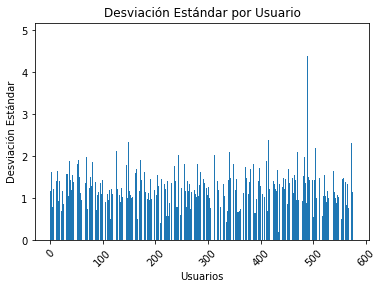

In [131]:
plt.bar(df_std.index, df_std['Desviacion Estandar'])
plt.xlabel('Usuarios')
plt.ylabel('Desviación Estándar')
plt.title('Desviación Estándar por Usuario')
plt.xticks(rotation=45)
plt.show()

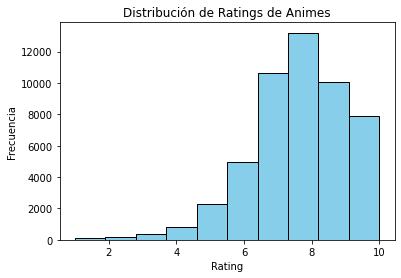

In [132]:
plt.hist(gran_df_sparse.values.flatten(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings de Animes')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [133]:
mejores_animes = gran_df_sparse.T.mean().sort_values(ascending=False).head(10)
mejores_animes

7463     10.0
5597     10.0
9120     10.0
35006    10.0
1961     10.0
3419     10.0
6591     10.0
38475    10.0
4246     10.0
5065     10.0
dtype: float64

In [134]:
peores_animes = gran_df_sparse.T.mean().sort_values().head(10)
peores_animes

8171     1.0
33021    1.0
16436    1.0
4099     1.0
13405    1.0
16610    1.0
16606    1.0
11897    1.0
11883    1.0
11679    1.0
dtype: float64

In [135]:
popularidad_animes = gran_df_sparse.T.count().sort_values(ascending=False)
popularidad_animes

16498    303
11757    283
1535     263
5114     216
19815    197
        ... 
37994      1
1409       1
14653      1
14117      1
696        1
Length: 4741, dtype: int64

In [141]:
usuarios_activos = gran_df_sparse.T.count(axis=1).sort_values(ascending=False)
usuarios_activos

4117803:Rixardinho77       989
3653827:Bulldrek           799
3797081:0704               660
4221429:Stryer             644
4196359:kma_               614
                          ... 
3530339:TachibanaMarika      1
3843925:Sir_Lumi             1
4094571:dorozthedino         1
3615029:McCash34             1
3599443:AdamFun              1
Length: 578, dtype: int64

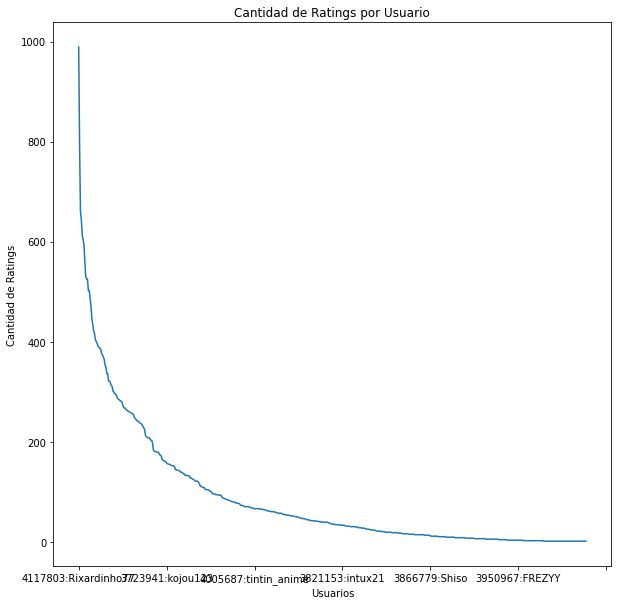

In [139]:
# Ahora analizamos posibles patrones en base a la cantidad de ratings que cada 
# usuario da a cada anime

plt.figure(figsize=(10, 10))
usuarios_activos.T.plot(legend=False)
plt.title('Cantidad de Ratings por Usuario')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de Ratings')
plt.show()

In [178]:
# A continuación haremos un muestreo aleatorio para la creación de un heatmap
df_sparse_sample = gran_df_sparse.sample(n=50, axis=0)
df_sparse_sample = df_sparse_sample.sample(n=25, axis=1)

# Convertimos la matriz dispersa a una matriz densa
df_dense_sample = pd.DataFrame(df_sparse_sample.to_numpy())

# Llenamos los valores NaN con ceros
df_sample_filled = df_dense_sample.fillna(0)

# Escalamos los datos
scaler = MinMaxScaler()
df_sample_normalized = pd.DataFrame(scaler.fit_transform(df_sample_filled), columns=df_sample_filled.columns)


In [181]:
df_sample_normalized

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
6,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
7,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
8,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
9,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [179]:
# Aplicamos PCA para una mejor visualización del heatmap
n_components = 5
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(df_sample_normalized), columns=[f'PC{i+1}' for i in range(n_components)])


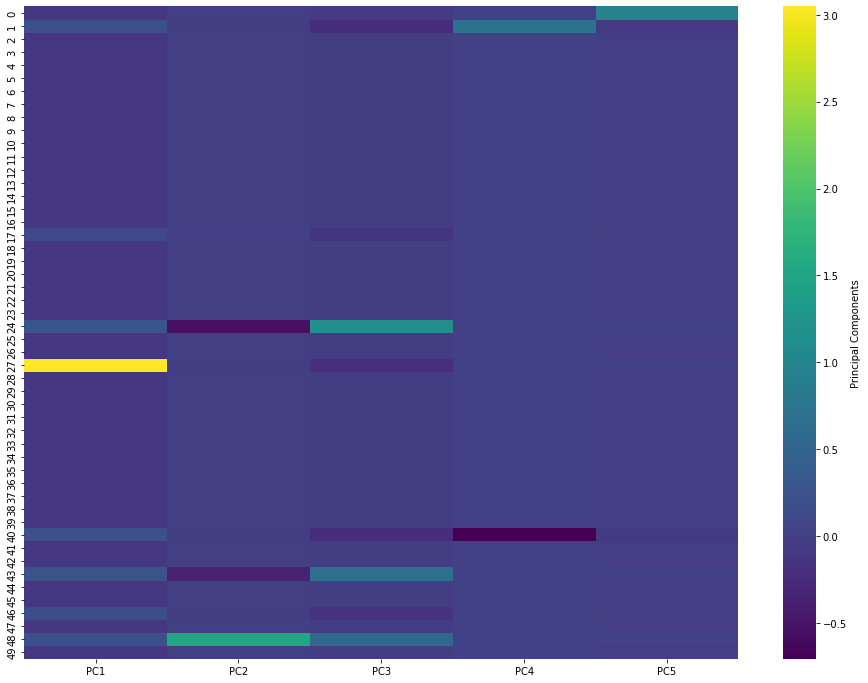

In [180]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_pca, cmap='viridis', cbar_kws={'label': 'Principal Components'})
plt.show()